In [72]:
import pandas as pd 
import numpy as np
import os

import sys
sys.path.append('/home/spankaew/Git/astrologics/')
import astrologics as le
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

In [73]:
endpoint = pd.read_csv('/home/spankaew/Git/astrologics/data/rand_experiment/rand_index_endpointclustering_v2.csv', index_col=0)
alltraj = pd.read_csv('/home/spankaew/Git/astrologics/data/rand_experiment/rand_index_alltrajclustering_v2.csv', index_col=0)

# Combine the two DataFrames
combined_df = pd.concat([endpoint, alltraj], axis=1, keys=['Endpoint Clustering', 'All Trajectories Clustering'])

In [74]:
endpoint_average = endpoint.mean(axis=0)
endpoint_average.sort_values(ascending=False, inplace=True)
endpoint_average.name = 'Endpoint-ARI'

In [75]:
alltraj_average = alltraj.mean(axis=0)
alltraj_average.sort_values(ascending=False, inplace=True)
alltraj_average.name = 'AllTraj-ARI'

In [76]:
model_attributes = pd.read_csv('/home/spankaew/Git/astrologics/data/attractor_group/attractor_counts.csv', index_col=0)
model_attributes.set_index('project_name', inplace=True)
model_attributes.drop(index = ['toy_reprogramming_1','herault_hematopoiesis'], inplace=True)
model_attributes = pd.concat([model_attributes, endpoint_average, alltraj_average], axis=1, ignore_index = False)
model_attributes.sort_values(by='Endpoint-ARI', ascending=False, inplace=True)
model_attributes

,num_model,num_attractors,gini_score,Endpoint-ARI,AllTraj-ARI
Toll Pathway of Drosophila Signaling Pathway_23868318,16,6,0.166667,1.000000,1.000000
HH Pathway of Drosophila Signaling Pathways_23868318,1000,1000,0.000000,1.000000,1.000000
VEGF Pathway of Drosophila Signaling Pathway_23868318,1000,390,0.247405,1.000000,0.997282
FGF pathway of Drosophila Signaling Pathways_23868318,1000,570,0.250484,1.000000,0.990512
toy_reprogramming,8,8,0.000000,1.000000,1.000000
test_bonesis,88,2,0.090909,1.000000,1.000000
synthetic_random_diff,1000,1,0.000000,1.000000,1.000000
Processing of Spz Network from the Drosophila Signaling Pathway_23868318,1000,152,0.398947,1.000000,0.998501
Death Receptor Signaling_20221256,1000,16,0.285500,1.000000,1.000000
Mammalian Cell Cycle_19118495,1000,7,0.642571,0.999982,0.773635


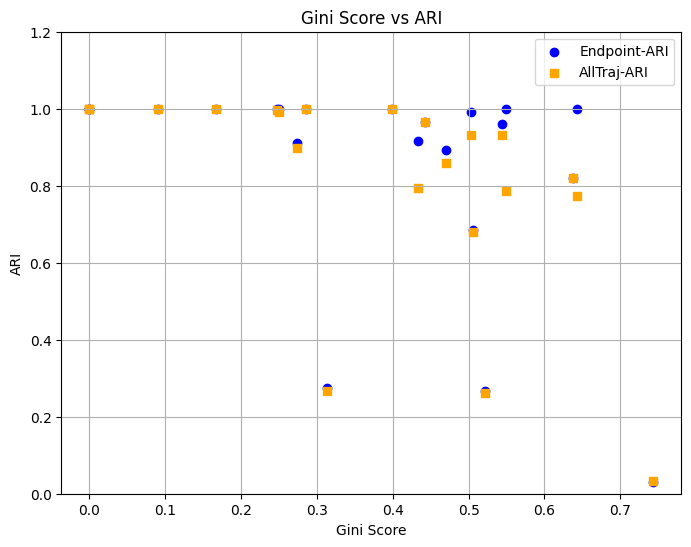

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(model_attributes['gini_score'], model_attributes['Endpoint-ARI'], label='Endpoint-ARI', color='blue', marker='o')
plt.scatter(model_attributes['gini_score'], model_attributes['AllTraj-ARI'], label='AllTraj-ARI', color='orange', marker='s')
plt.xlabel('Gini Score')
plt.ylabel('ARI')
plt.ylim(0,1.2)
plt.title('Gini Score vs ARI')
plt.legend()
plt.grid(True)
plt.show()

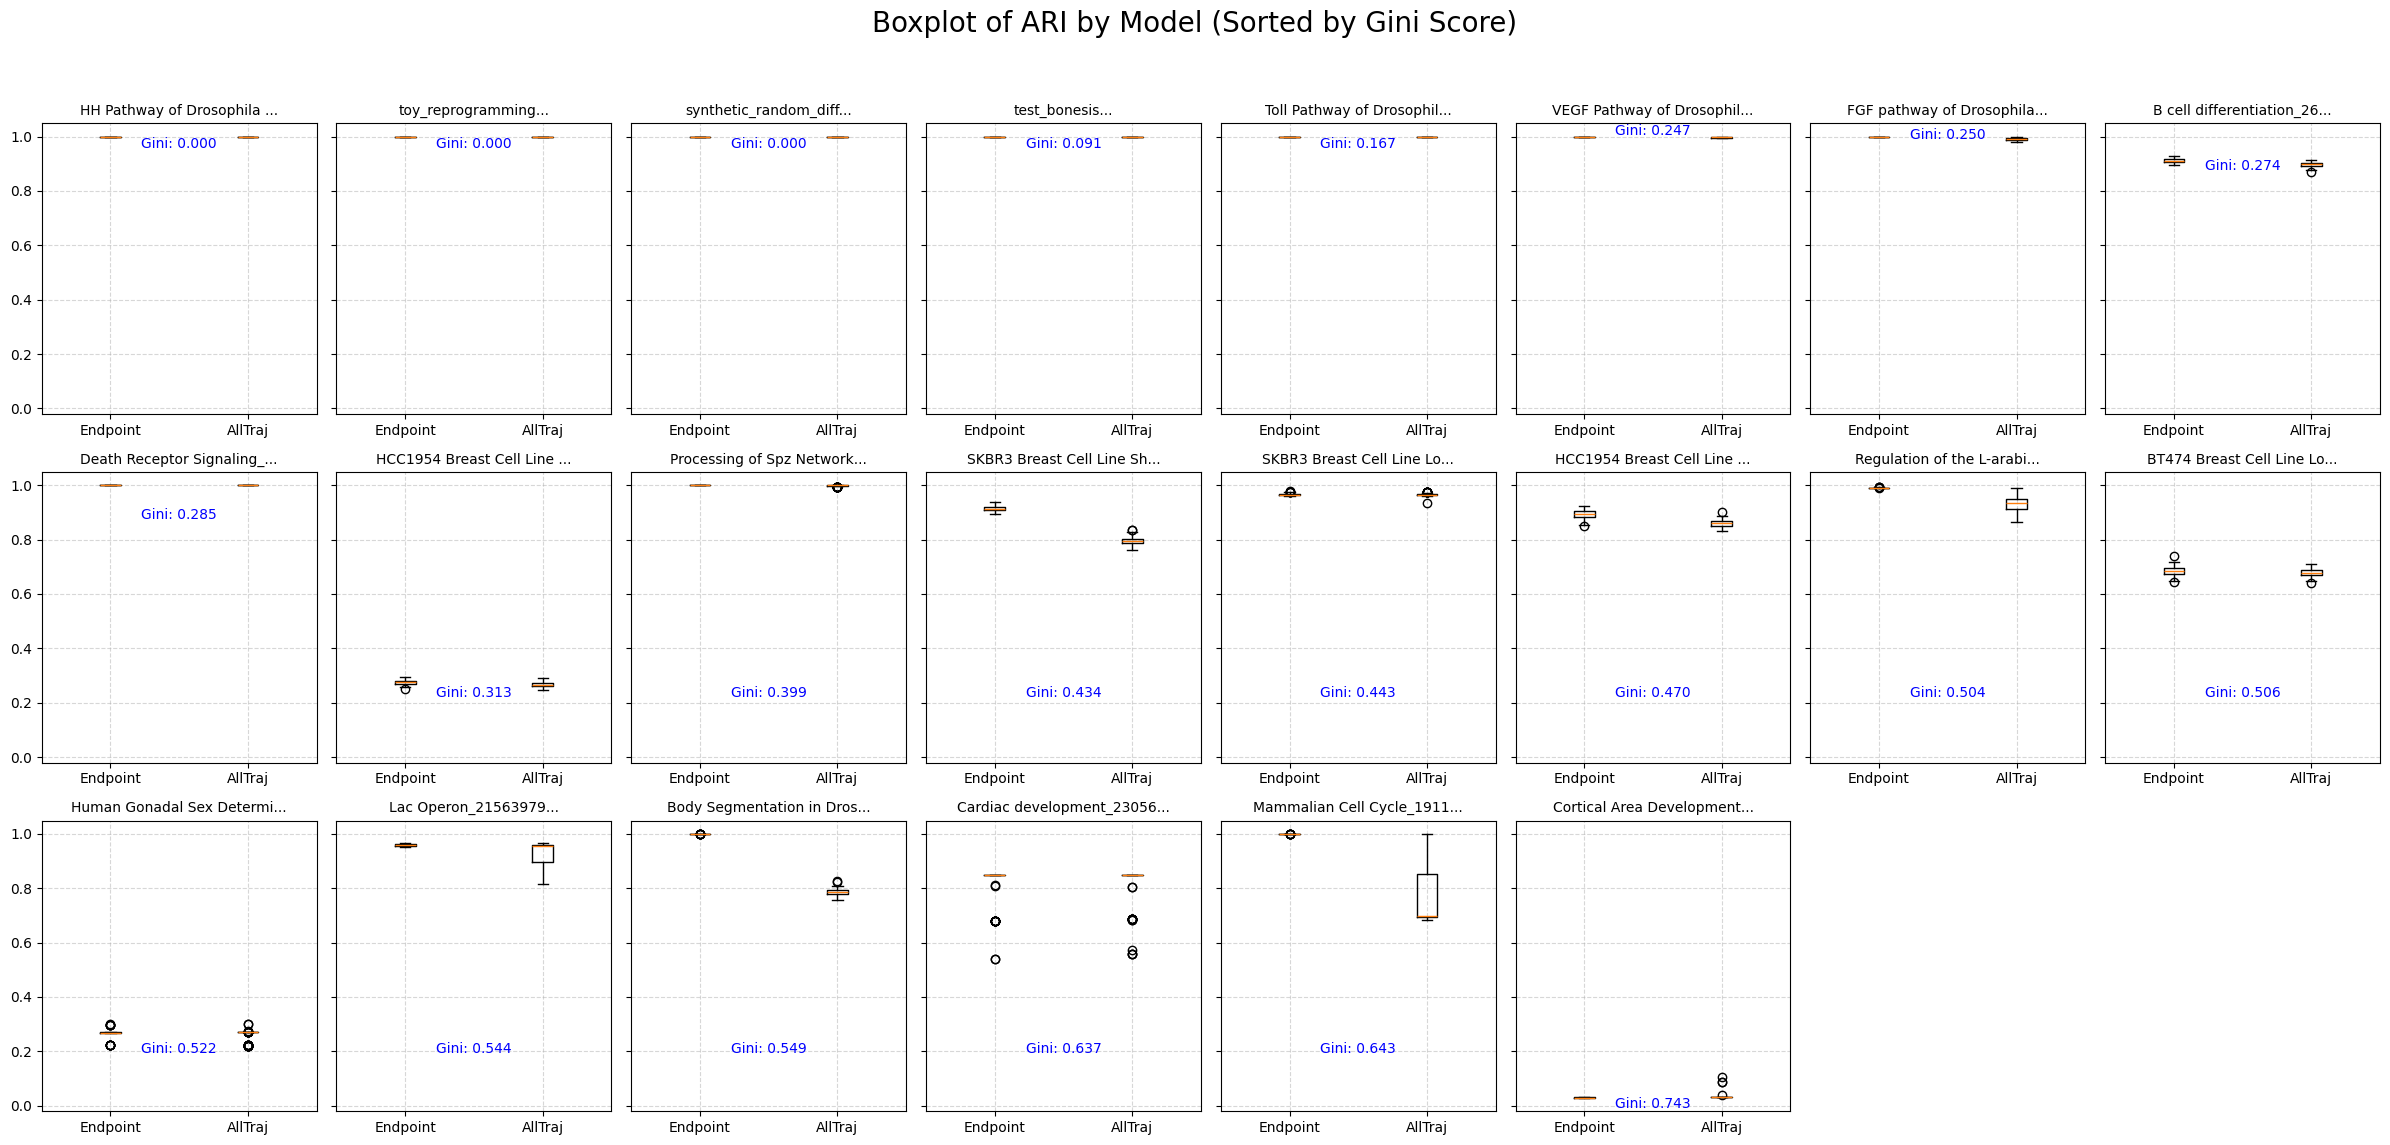

In [79]:
import matplotlib.pyplot as plt

# Sort models by gini_score
sorted_models = model_attributes.sort_values('gini_score').index.tolist()

fig, axes = plt.subplots(3, 8, figsize=(24, 12), sharey=True)
axes = axes.flatten()

for i, model in enumerate(sorted_models):
    data = [
        endpoint[model],
        alltraj[model]
    ]
    axes[i].boxplot(data, tick_labels=['Endpoint', 'AllTraj'])
    axes[i].set_title(model[:25] + '...', fontsize=10)
    axes[i].set_xticklabels(['Endpoint', 'AllTraj'], rotation=0)
    gini = model_attributes.loc[model, 'gini_score']
    ymin = axes[i].get_ylim()[0]
    axes[i].text(1.5, ymin, f"Gini: {gini:.3f}", ha='center', va='bottom', fontsize=10, color='blue')
    axes[i].grid(True, linestyle='--', alpha=0.5)
# Hide unused subplots if any
for j in range(len(sorted_models), len(axes)):
    axes[j].axis('off')

fig.suptitle('Boxplot of ARI by Model (Sorted by Gini Score)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [67]:
def gini(array):
    """Calculate Gini coefficient of array of values."""
    array = np.sort(np.array(array))
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return (2 * np.sum(index * array) / (n * np.sum(array))) - (n + 1) / n

In [71]:
path_to_file = '/home/spankaew/Git/astrologics/data/attractor_group/'
project_name = 'Regulation of the L-arabinose operon of Escherichia coli_28639170'

attractor_counts = pd.DataFrame(columns=['project_name', 'num_model', 'num_attractors', 'gini_score'])
attractor_df = pd.read_csv(path_to_file + '/calculated_attractor/' + project_name + '_attractors.csv', index_col=0)
concatenated_columns = attractor_df.apply(lambda col: ''.join(col.astype(str)), axis=0)
vis_bar = pd.DataFrame(concatenated_columns.value_counts().sort_values(ascending=False))
vis_bar['attractor_group'] = [i for i in range(len(vis_bar))]
vis_bar = vis_bar.reset_index()

# Create dictionary for mapping
model_path = path_to_file + project_name +'/'
attractor_dict = dict(zip(vis_bar['index'], vis_bar['attractor_group']))
concatenated_columns = pd.DataFrame(concatenated_columns.map(attractor_dict), columns=['attractor_group'])
concatenated_columns.to_csv(path_to_file + '/attractor_group/' + project_name + '_attractor_group.csv', index = True)

# Calculate cluster distribution score
gini_score = gini(vis_bar['count'].values)

# Calculate the number of attractors
num_attractors = len(vis_bar)
num_model = len(concatenated_columns)
attractor_counts = pd.concat([attractor_counts, pd.DataFrame({'project_name': [project_name], 
                                                                'num_model': [num_model],
                                                                'num_attractors': [num_attractors],
                                                                'gini_score': [gini_score]})])
attractor_counts

/tmp/ipykernel_100467/4229815028.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  attractor_counts = pd.concat([attractor_counts, pd.DataFrame({'project_name': [project_name],


,project_name,num_model,num_attractors,gini_score
0,Regulation of the L-arabinose operon of Escher...,1000,130,0.503708


In [47]:
simulation_test = pd.read_csv('/home/spankaew/Git/astrologics/data/simulation_files/Cardiac development_23056457_simulation.csv', index_col=0)

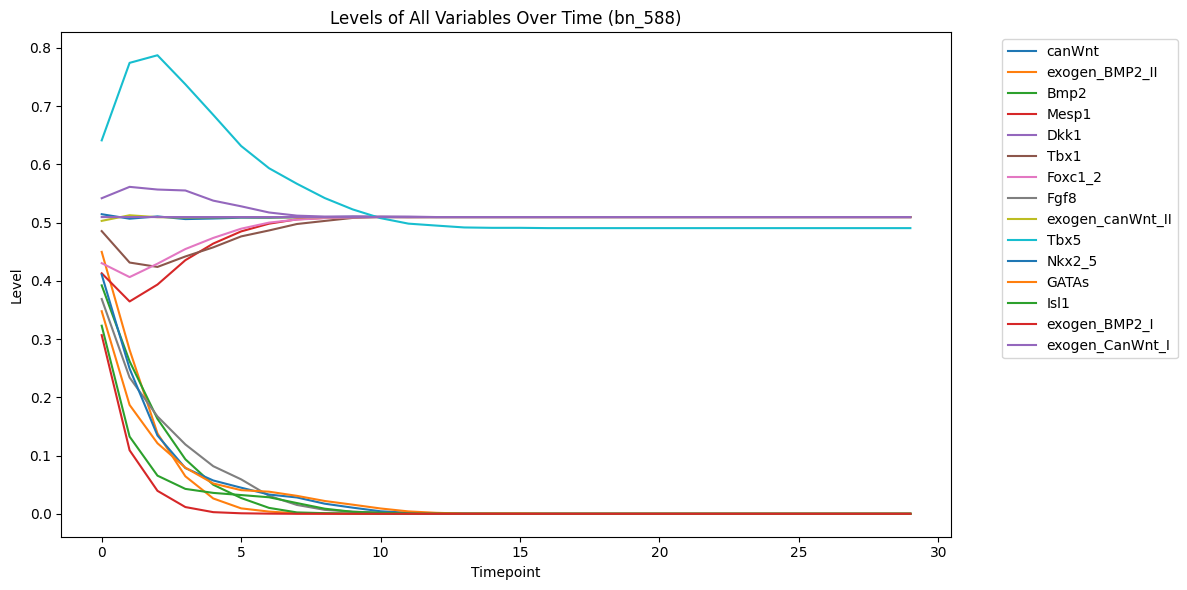

In [50]:
test = simulation_test[simulation_test['model_id'] == 'bn_191']
test.set_index('timepoint', inplace=True)
test.plot(y=[col for col in test.columns if col != 'model_id'], use_index=True, figsize=(12, 6))
plt.xlabel('Timepoint')
plt.ylabel('Level')
plt.title('Levels of All Variables Over Time (bn_588)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()